In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## 데이터 로드

In [74]:
df = pd.read_csv("/Users/ohheungchan/workspace/AI_Study/diabetes.csv")
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,,,,,,,,
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
10,101,76,48,180,32.9,0.171,63,0
2,122,70,27,0,36.8,0.340,27,0
5,121,72,23,112,26.2,0.245,30,0


### 라벨 및 분포 확인

In [75]:
# 결측치 확인
df.isnull().sum()

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [76]:
# 결측치 제거
df = df.dropna()
df.isnull().sum()

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [77]:
y = df["BMI"]
y 

Pregnancies
6     33.6
1     26.6
8     23.3
1     28.1
0     43.1
      ... 
10    32.9
2     36.8
5     26.2
1     30.1
1     30.4
Name: BMI, Length: 768, dtype: float64

In [78]:
y.unique()

array([33.6, 26.6, 23.3, 28.1, 43.1, 25.6, 31. , 35.3, 30.5,  0. , 37.6,
       38. , 27.1, 30.1, 25.8, 30. , 45.8, 29.6, 43.3, 34.6, 39.3, 35.4,
       39.8, 29. , 36.6, 31.1, 39.4, 23.2, 22.2, 34.1, 36. , 31.6, 24.8,
       19.9, 27.6, 24. , 33.2, 32.9, 38.2, 37.1, 34. , 40.2, 22.7, 45.4,
       27.4, 42. , 29.7, 28. , 39.1, 19.4, 24.2, 24.4, 33.7, 34.7, 23. ,
       37.7, 46.8, 40.5, 41.5, 25. , 25.4, 32.8, 32.5, 42.7, 19.6, 28.9,
       28.6, 43.4, 35.1, 32. , 24.7, 32.6, 43.2, 22.4, 29.3, 24.6, 48.8,
       32.4, 38.5, 26.5, 19.1, 46.7, 23.8, 33.9, 20.4, 28.7, 49.7, 39. ,
       26.1, 22.5, 39.6, 29.5, 34.3, 37.4, 33.3, 31.2, 28.2, 53.2, 34.2,
       26.8, 55. , 42.9, 34.5, 27.9, 38.3, 21.1, 33.8, 30.8, 36.9, 39.5,
       27.3, 21.9, 40.6, 47.9, 50. , 25.2, 40.9, 37.2, 44.2, 29.9, 31.9,
       28.4, 43.5, 32.7, 67.1, 45. , 34.9, 27.7, 35.9, 22.6, 33.1, 30.4,
       52.3, 24.3, 22.9, 34.8, 30.9, 40.1, 23.9, 37.5, 35.5, 42.8, 42.6,
       41.8, 35.8, 37.8, 28.8, 23.6, 35.7, 36.7, 45

In [79]:
X = df.drop("Outcome" , axis = 1)
X=X.drop("BMI" , axis = 1)


In [80]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0) 

In [81]:
from sklearn.preprocessing import RobustScaler
robustScaler = RobustScaler()
train_robust = robustScaler.fit_transform(X_train)
test_robust = robustScaler.fit_transform(X_test)

In [82]:

X_train.shape, y_train.shape, X_test.shape, y_test.shape, 

((614, 6), (614,), (154, 6), (154,))

In [84]:
#Defining the model 

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam

model = Sequential()
model.add(Dense(10, input_shape=(6,), activation='tanh'))  
model.add(Dense(50, activation='tanh'))
model.add(Dense(50, activation='tanh'))
model.add(Dense(1,))

model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])

model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_50 (Dense)            (None, 10)                70        
                                                                 
 dense_51 (Dense)            (None, 50)                550       
                                                                 
 dense_52 (Dense)            (None, 50)                2550      
                                                                 
 dense_53 (Dense)            (None, 1)                 51        
                                                                 
Total params: 3,221
Trainable params: 3,221
Non-trainable params: 0
_________________________________________________________________


In [85]:
N_EPOCHS = 200

history=model.fit(x=train_robust, y=y_train, epochs=N_EPOCHS, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

Epoch 1/200


2024-09-16 12:31:34.640861: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


20/20 [==============================] - 1s 22ms/step - loss: 1041.3478 - mse: 1041.3478 - val_loss: 816.1895 - val_mse: 816.1895
Epoch 2/200
 1/20 [>.............................] - ETA: 0s - loss: 895.3795 - mse: 895.3795

2024-09-16 12:31:35.399694: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


20/20 [==============================] - 0s 8ms/step - loss: 924.9864 - mse: 924.9864 - val_loss: 687.5607 - val_mse: 687.5607
Epoch 3/200
20/20 [==============================] - 0s 7ms/step - loss: 803.5103 - mse: 803.5103 - val_loss: 608.4288 - val_mse: 608.4288
Epoch 4/200
20/20 [==============================] - 0s 7ms/step - loss: 682.6500 - mse: 682.6500 - val_loss: 584.1137 - val_mse: 584.1137
Epoch 5/200
20/20 [==============================] - 0s 7ms/step - loss: 569.9229 - mse: 569.9229 - val_loss: 582.6971 - val_mse: 582.6971
Epoch 6/200
20/20 [==============================] - 0s 9ms/step - loss: 470.2784 - mse: 470.2784 - val_loss: 578.5998 - val_mse: 578.5998
Epoch 7/200
20/20 [==============================] - 0s 7ms/step - loss: 393.0210 - mse: 393.0210 - val_loss: 555.1947 - val_mse: 555.1947
Epoch 8/200
20/20 [==============================] - 0s 8ms/step - loss: 335.6067 - mse: 335.6067 - val_loss: 522.7183 - val_mse: 522.7183
Epoch 9/200
20/20 [====================

2024-09-16 12:32:03.639992: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


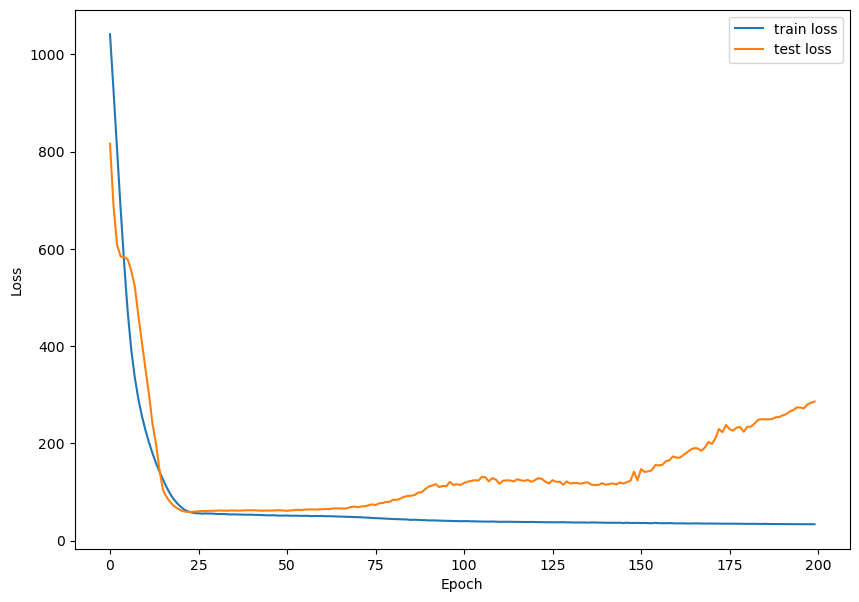

In [86]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [87]:

model.evaluate(test_robust, y_test)

5/5 [==============================] - 0s 15ms/step - loss: 51.4053 - mse: 51.4053


2024-09-16 13:09:11.037905: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


[51.405269622802734, 51.405269622802734]